# Introduction to graphons using pygraphon

In this notebook, we introduce the basics of graphons using the package pygraphon.

In [1]:
from pygraphon.core.base import Graphon

%load_ext autoreload
%autoreload 2

%matplotlib inline

## Graphons and exchangeable random graphs
A graphon $W$ is a measurable function $W: [0,1]^2 \rightarrow [0,1]$ such that $W(x,y) = W(y,x)$, i.e., $W$ is a symmetric function.

Consider the graphon given by $W(x,y) = \frac{1}{2}$. This is an Erd\"os-R\'enyi graph with probability $\frac{1}{2}$. We can express this in pygraphon by creating a Graphon object which takes in such a function:

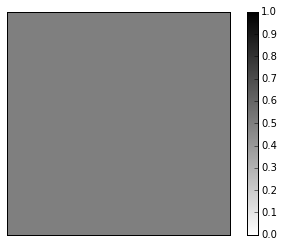

In [2]:
from pygraphon.core.graphons import er

er_quasi = er(0.5) # returns the function lambda x,y: 0.5
ER = Graphon(er_quasi)
ER.plot(colorbar=True)

The cell above shows the input as the unit square $[0,1]^2$ and the output a value between $[0,1]$, where the color represents a this value on a grayscale gradient. Here white correponds to 0, and 1 corresponds to black. In an adjacency matrix, we just have black and white pixels (called pixel pictures).

Given a graphon, we can sample an exchangeable graph $(G_{ij})_{i,j\in [n]}, (\text{where } [n]:=\{1,\ldots,n\}), n \in \mathbb{N} \cup \infty$ from it as follows:
\begin{align}
U_i &\sim_{\text{iid}} \text{Uniform}[0,1] \\
G_{\{ij\}}  &\sim_{\text{ind}} \text{Bernoulli}(W(U_i, U_j))\\
\end{align}

In pygraphon, given the Graphon object, we can then sample (and plot) a finite graph from it as follows:

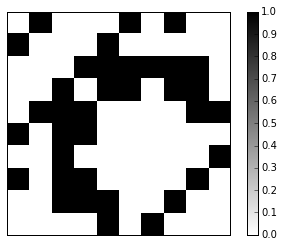

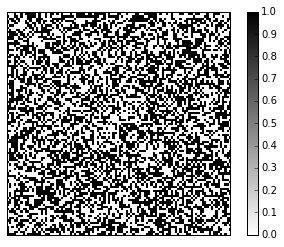

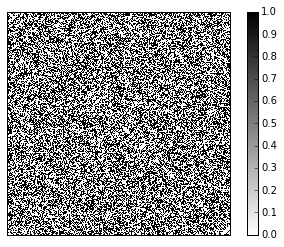

In [3]:
er1 = ER.sample(10) # 10 vertices
er1.plot(colorbar=True)

er2 = ER.sample(100) # 100 vertices
er2.plot(colorbar=True)

er3 = ER.sample(1000) # 1000 vertices
er3.plot(colorbar=True)

Notice that as $n$ gets bigger, each image looks more and more like one big "gray pixel" -- that's because the graphon is a graph limit. To see this more clearly, consider the following example of a graphon:
$$ W(x,y) = \frac{(1-x) + (1-y)}{2}. $$
We will refer this this throughout as the "gradient" graphon because it looks like this:

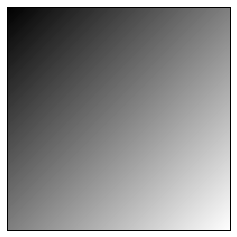

In [4]:
from pygraphon.core.graphons import gradient

grad = Graphon(gradient)
grad.plot()

This is more interesting than the ER example, which is just a single big "gray pixel" -- here we see a continuous gradient. Also note the symmetry in the function.  

Here are 3 random samples of size $n=10, 100, 1000$ from this gradient graphon.

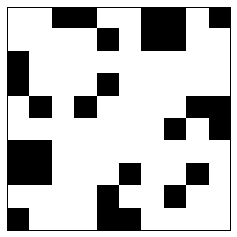

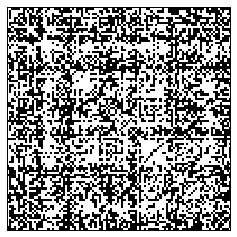

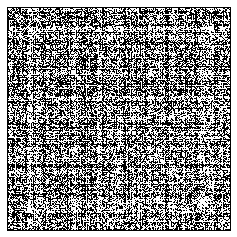

In [5]:
grad1 = grad.sample(10)
grad1.plot()

grad2 = grad.sample(100)
grad2.plot()

grad3 = grad.sample(1000)
grad3.plot()

Notice the structure in these random samples already looks a little different from the ER graphon example.
But to see the graph limit part of it, we are going to rearrange these by the uniform random variables that
we sampled originally -- because these are exchangeable graphs, simultaneously rerranging the rows and columns
of the adjacency matrix won't change the distribution of the underlying graph. We'll see that you can recover various structure by just reordering the rows and columns of the adjacency matrix.

The idea here is that when we sort the graph by the $U_i$'s, we will get something that looks close to the original graphon, since the $U_i$'s tell us from which part of the graphon to sample.

The rearranged samples, sorted by the $U_i$'s look like:

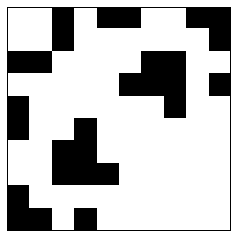

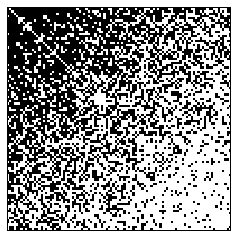

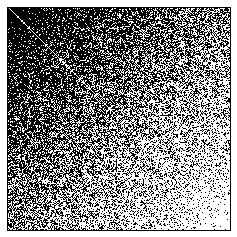

In [6]:
grad1.sort_by_unifs().plot()
grad2.sort_by_unifs().plot()
grad3.sort_by_unifs().plot()

For a comparison, resorting the ER samples from earlier by the $U_i$'s looks like this:

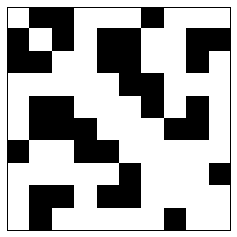

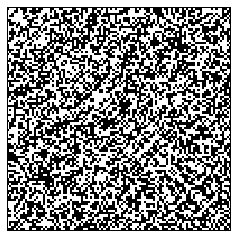

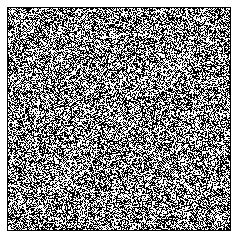

In [7]:
er1.sort_by_unifs().plot()
er2.sort_by_unifs().plot()
er3.sort_by_unifs().plot()

Aside: finite graphs can also be viewed as graphons by promoting them to step-functions.

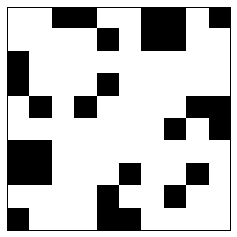

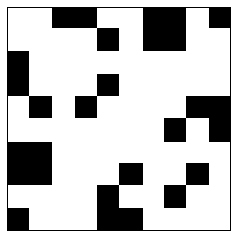

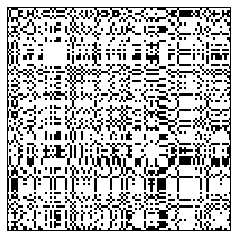

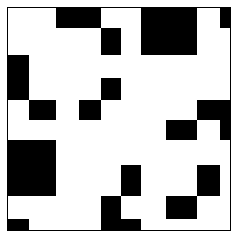

In [8]:
grad1.plot() # as a finitegraph
grad1_graphon = grad1.to_step_function() # promote finite graph to a step-function
grad1_graphon.plot() # as a graphon
grad1_graphon.sample(100).plot() # a sample from this step-function graphon
grad1_graphon.sample(100).sort_by_unifs().plot() # sorted by unifs -- looks like the original (but not quite)

Step-function graphons don't have to be black and white (0-1 valued) -- they can take on any value. Block models are an example of this. In fact, many models for graphs based on stochastic block models give random graphons.

Consider the nonparametric version of the stochastic block model (symmetric infinite relational model). Here we partition the vertices according to a Chinese Restaurant Process (or the interval $[0,1]$ according to a Dirichlet stick-breaking process),
and then draw weights from a Beta distribution.

Here are some realizations from the symmetric IRM along with samples from the graphons, sorted by increasing $U_i$:

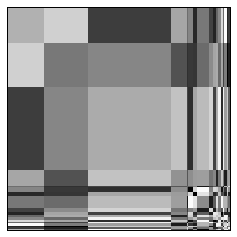

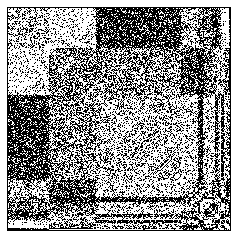

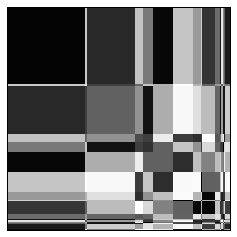

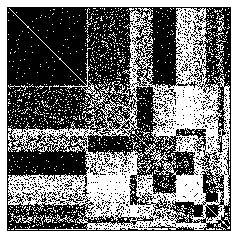

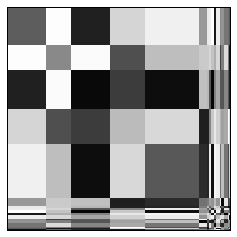

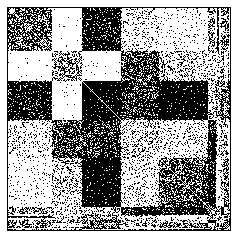

In [9]:
from pygraphon.core.graphons import IRM_symmetric

# realizations
irm1 = Graphon(IRM_symmetric(T=1000, alpha=5, a=1, b=1, seed=None))
irm2 = Graphon(IRM_symmetric(T=1000, alpha=5, a=1, b=1, seed=None))
irm3 = Graphon(IRM_symmetric(T=1000, alpha=5, a=1, b=1, seed=None))

# 200-vertex sample from 1st realization, sorted by unifs 
irm1.plot()
irm1_samp = irm1.sample(300)
irm1_samp.sort_by_unifs().plot()

# 200-vertex sample from 2nd realization, sorted by unifs 
irm2.plot()
irm2_samp = irm2.sample(300)
irm2_samp.sort_by_unifs().plot()

# 200-vertex sample from 3rd realization, sorted by unifs 
irm3.plot()
irm3_samp = irm3.sample(300)
irm3_samp.sort_by_unifs().plot()

We might also be interested in different sorting schemes, e.g., sorting the vertices by degree (the number of edges a vertex is connected to). 

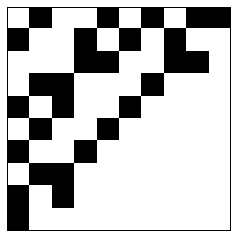

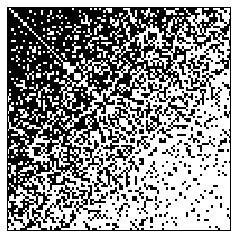

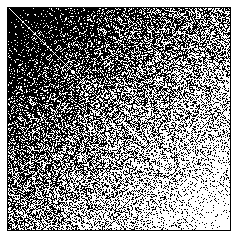

In [10]:
grad1.sort_by_degree().plot()
grad2.sort_by_degree().plot()
grad3.sort_by_degree().plot()

This looks a lot like the graphs that were reordered by $U_i$'s (but we can see it's not the same permutation from the $n=10$ example). That is, we get gradient structure upon resorting for both.

But most exchangeable graphs are not degree-sortable, as it requires the graphon to be monotonizable (or at the very least partially monotonizable up to some partition).

Consider the following 2 examples from block models. The first is the IRM sample and the second is a sample from a $2\times 2$ block model. In both, we can see that the pixel pictures of the sample resorted by the $U_i$'s is very different from the sample resorted by degree.

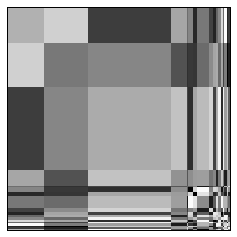

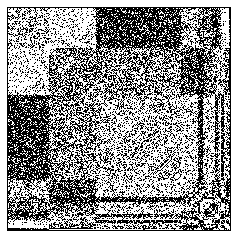

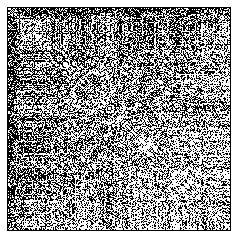

In [11]:
# graphon
irm1.plot()
# sample sorted by unifs
irm1_samp.sort_by_unifs().plot()
# sample sorted by degree
irm1_samp.sort_by_degree().plot()

In the degree-sorted picture, we can still see some block structure, but it's clearly not very close to the original.

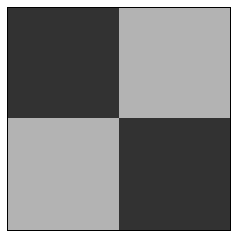

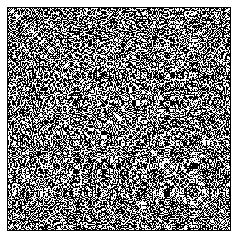

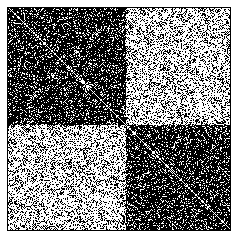

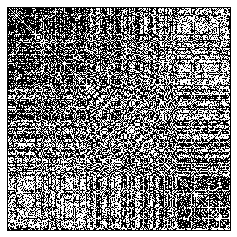

In [12]:
from pygraphon.core.graphons import SBM
sbm = Graphon(SBM(0.3, 0.8, 0.5))
sbm.plot()

sbm_samp = sbm.sample(300)
sbm_samp.plot()
sbm_samp.sort_by_unifs().plot()
sbm_samp.sort_by_degree().plot()

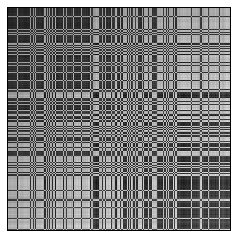

In [13]:
sbm_samp.sort_by_degree().smooth().plot()

Once again, the block structure in the picture of the sample sorted by $U_i$'s is super obvious and matches the original, whereas in the degree sorted sample, there is no visible block structure at all (as opposed to the IRM example).

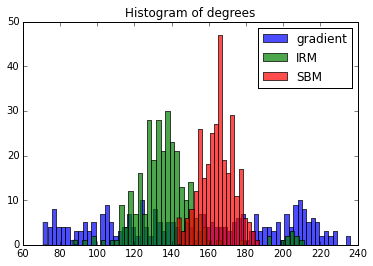

In [14]:
grad0 = grad.sample(300)
_= pylab.hist(grad0.graph.sum(0), bins=70, alpha=0.7) 
_= pylab.hist(irm1_samp.graph.sum(0), bins=50, alpha=0.7) 
_= pylab.hist(sbm_samp.graph.sum(0), bins=20, alpha=0.7)
pylab.legend(['gradient', 'IRM', 'SBM'])
pylab.title('Histogram of degrees')

## Graphon estimation basics

We might want to estimate a graphon given a single graph sample. Two problems we might be interested in are:

1. Graphon function estimation - estimating the function (up to some measure-preserving transformation). 

2. Graphon value estimation - estimating the array of probabilities (weighted graph) from the points in which the graph was sampled.

We now show how you might obtain simple estimates for both of these problems. For the latter value estimation problem, we show how to evaluate an estimate using the mean square error.

We first consider the gradient graphon. Previously, we saw that sorting the adjacency matrix by degree recovers gradient structure. One class of estimators focuses on sorting by degree and then smoothing the graph in some way to obtain an estimator -- this is a value estimator but can be turned into a function estimator by promoting it to a step-function.

In this example, we first sort by degree and then smooth using a method called universal singular value thresholding (USVT) -- this method basically takes the SVD of the matrix, thresholds the singular values, and returns the resulting matrix with the thresholded singular values.

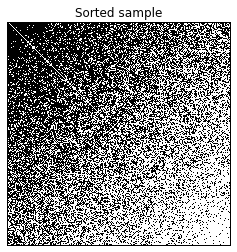

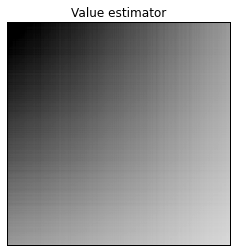

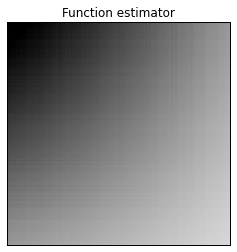

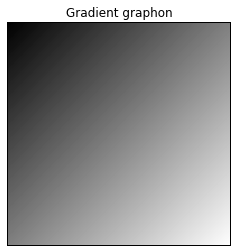

In [15]:
grad3_sort = grad3.sort_by_degree() # sort by degree
grad3_sort.plot(title='Sorted sample')

est = grad3_sort.smooth() # smoothing using USVT, returns a GraphonValueEstimator object
est.plot(title='Value estimator')

est.to_graphon_function().plot(title='Function estimator') # aside: can turn the value estimator into a GraphonFunctionEstimator

grad.plot(title='Gradient graphon')

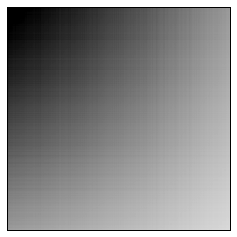

In [16]:
est = grad3_sort.smooth() # smoothing using USVT, returns a GraphonValueEstimator object
est.plot()


To compute the mean squared error (MSE), we consider the weighed graph $M_{ij} := W(U_i, U_j)$. The mean squared error is given by:
$$\frac{1}{n^2}\sum_{i,j} \left(M_{ij} - \widehat{M}_{ij}\right)^2$$

Here $(\widehat{M}_{ij})$ is the value estimator where the array is ordered according the order the vertices in the graph $(G_{ij})$ were sampled. The first plot below shows the weighted graph $(M_{ij})$ and the second plot shows the graph reordered by the $U_i$'s.

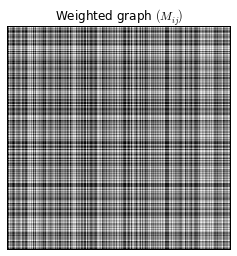

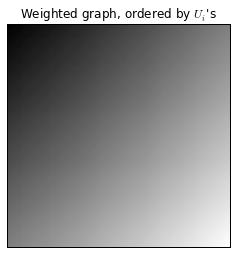

In [17]:
grad3.get_weighted_graph().plot(title='Weighted graph $(M_{ij})$')
gsorted = grad3.get_weighted_graph().sort_by_unifs()
gsorted.plot(title='Weighted graph, ordered by $U_i$\'s')
#est.compute_MSE(grad3.get_weighted_graph(), grad3_sort.permutation) # MSE

For the IRM example, we consider an estimator formed from sorting by degree and then histogramming the vertices. The histogram estimator is given by specifiying a number of bins $m$, where each bin is equally sized.

This type of histogram estimator returns a step-function, or function estimate, but from it we can get a value estimator by taking the points in the function that correspond to the sampled graph.

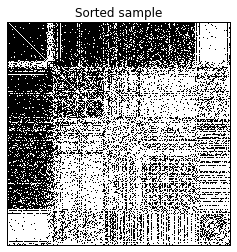

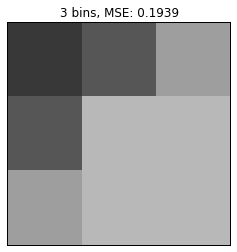

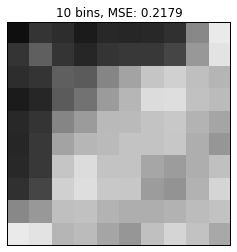

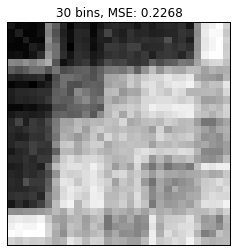

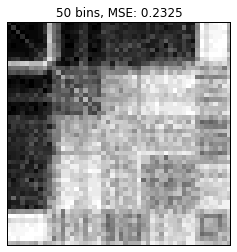

In [18]:
#irm3.plot()
samp = irm3_samp
irm_sorted = samp.sort_by_degree()
irm_sorted.plot(title='Sorted sample')

hist0 = irm_sorted.hist(3)
mse0 = hist0.compute_MSE(samp.get_weighted_graph(), irm_sorted.permutation)
hist0.plot(title='3 bins, MSE: %.4f' % mse0)

hist1 = irm_sorted.hist(10)
mse1 = hist1.compute_MSE(samp.get_weighted_graph(), irm_sorted.permutation)
hist1.plot(title='10 bins, MSE: %.4f' % mse1)

hist2 = irm_sorted.hist(30)
mse2 = hist2.compute_MSE(samp.get_weighted_graph(), irm_sorted.permutation)
hist2.plot(title='30 bins, MSE: %.4f' % mse2)


hist3 = irm_sorted.hist(50)
mse3 = hist3.compute_MSE(samp.get_weighted_graph(), irm_sorted.permutation)
hist3.plot(title='50 bins, MSE: %.4f' % mse3)


This type of histogram estimator is one of the most basic ones you can specify. One open question is how we might choose the partition (e.g., sort it according to some other scheme rather than degree, or spacing the histogram into less-equitable sizes).

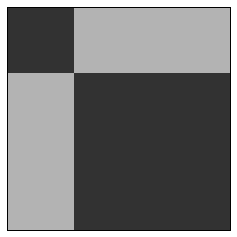

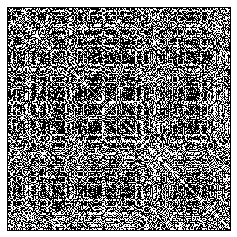

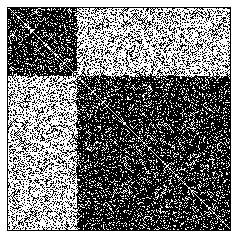

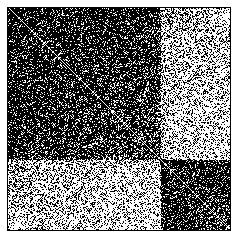

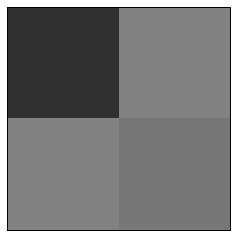

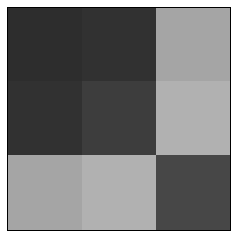

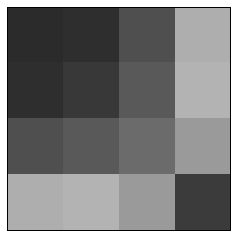

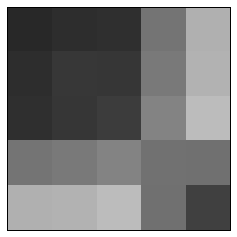

In [19]:
from pygraphon.core.graphons import SBM
sbm = Graphon(SBM(0.3, 0.8, 0.3))
sbm.plot()

sbm_samp = sbm.sample(300)
sbm_samp.plot()
sbm_samp.sort_by_unifs().plot()
sbm_samp.sort_by_degree().plot()

sbm_sorted = sbm_samp.sort_by_degree()

hist0 = sbm_sorted.hist(2)
mse0 = hist0.compute_MSE(sbm_samp.get_weighted_graph(), sbm_sorted.permutation)
hist0.plot()#title=2 bins, MSE: %.4f' % mse0)

hist1 = sbm_sorted.hist(3)
mse1 = hist1.compute_MSE(sbm_samp.get_weighted_graph(), sbm_sorted.permutation)
hist1.plot()#title='4 bins, MSE: %.4f' % mse1)

hist2 = sbm_sorted.hist(4)
mse2 = hist2.compute_MSE(sbm_samp.get_weighted_graph(), sbm_sorted.permutation)
hist2.plot()#title='5 bins, MSE: %.4f' % mse2)

hist3 = sbm_sorted.hist(5)
mse3 = hist3.compute_MSE(sbm_samp.get_weighted_graph(), sbm_sorted.permutation)
hist3.plot()#title='5 bins, MSE: %.4f' % mse3)

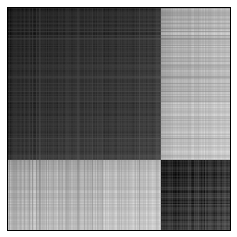

In [20]:
sbm_samp.sort_by_degree().smooth().plot()


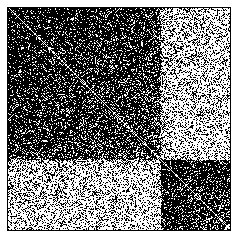

In [21]:
tri_sort = sbm_samp.sort_by_triangle()
tri_sort.plot()

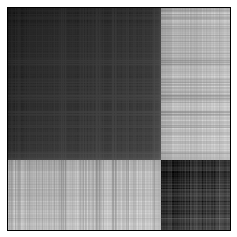

In [22]:
tri_sort.smooth().plot()

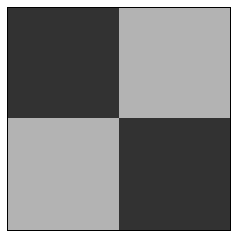

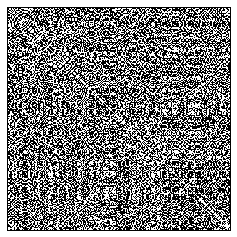

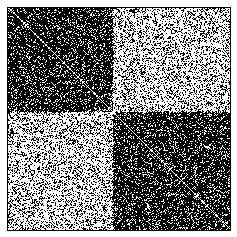

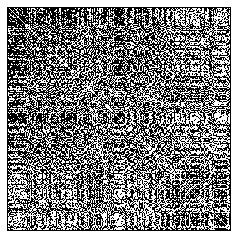

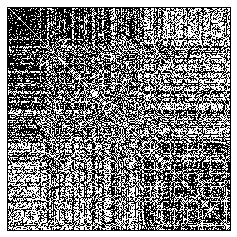

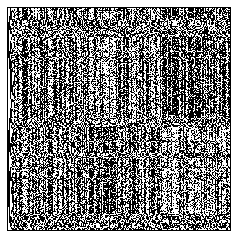

In [23]:
sbm = Graphon(SBM(0.3, 0.8, 0.5))
sbm.plot()
sbm_samp = sbm.sample(300)
sbm_samp.plot()
sbm_samp.sort_by_unifs().plot()
sbm_samp.sort_by_degree().plot()
sbm_samp.sort_by_triangle().plot()
sbm_samp.sort_by_gray().plot()

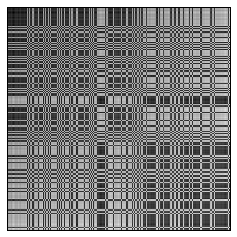

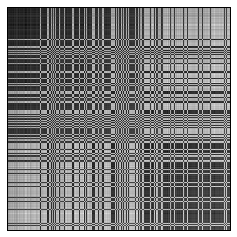

In [24]:
sbm_samp.sort_by_degree().smooth().plot()
sbm_samp.sort_by_triangle().smooth().plot()

In [25]:
grad_samp = grad.sample(200)

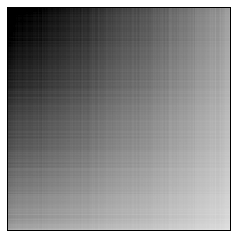

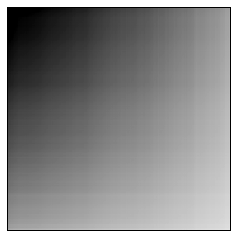

In [26]:
grad_samp.sort_by_degree().smooth().plot()
grad_samp.sort_by_triangle().smooth().plot()

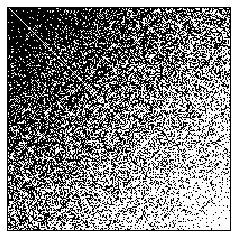

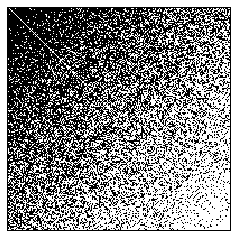

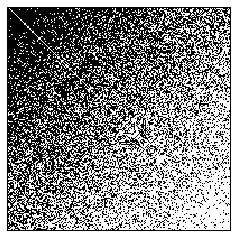

In [27]:
grad_samp.sort_by_unifs().plot()
grad_samp.sort_by_degree().plot()
grad_samp.sort_by_triangle().plot()

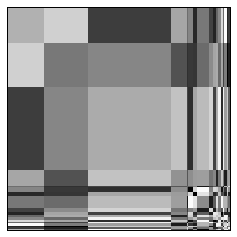

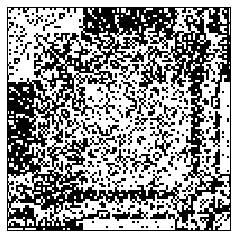

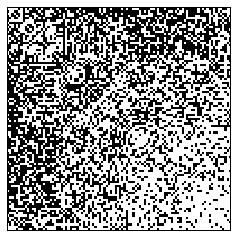

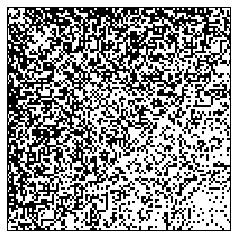

In [28]:
# graphon
irm1.plot()

irm2_samp = irm1.sample(100)
# sample sorted by unifs
irm2_samp.sort_by_unifs().plot()
# sample sorted by degree
irm_deg = irm2_samp.sort_by_degree()
irm_deg.plot()
#irm_deg.smooth().plot()

irm_tri = irm2_samp.sort_by_triangle()
irm_tri.plot()
#irm_tri.smooth().plot()

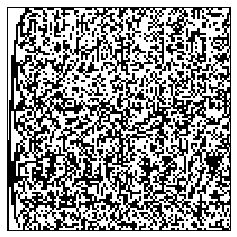

In [29]:
irm2_samp.sort_by_gray().plot()

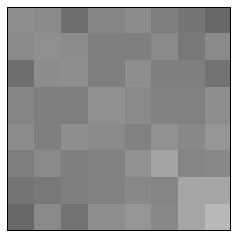

In [30]:
irm2_samp.sort_by_gray().hist(8).plot()